In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris_df = pd.read_csv("./data/Iris.csv")
iris_df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
print("Size of the data : ", iris_df.shape)

Size of the data :  (150, 5)


In [5]:
X = iris_df.drop("Species", axis = 1)
y = iris_df["Species"]

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
decison_tree = DecisionTreeClassifier(random_state=3)
decison_tree.fit(X,y)

DecisionTreeClassifier(random_state=3)

In [8]:
predictions = decison_tree.predict(X)
predictions

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

In [1]:
#to check accuracy
from sklearn.metrics import accuracy_score

In [10]:
print("Decision Tree Accuracy : ", accuracy_score(y, predictions))

Decision Tree Accuracy :  1.0


In [11]:
from sklearn.tree import export_graphviz
import graphviz

In [12]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

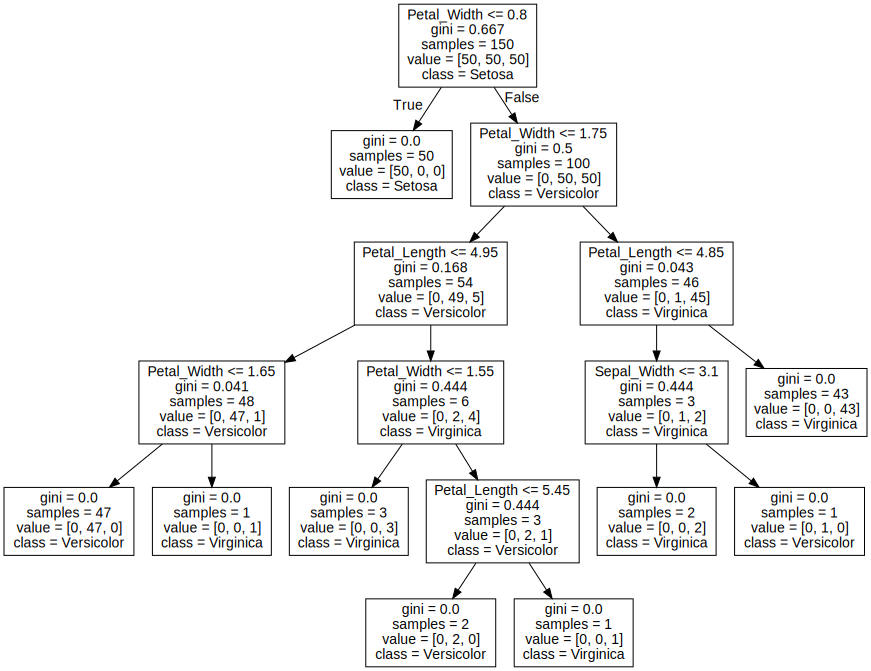

In [13]:
viz_data = export_graphviz(decison_tree,feature_names = X.columns, class_names = decison_tree.classes_)
tree = graphviz.Source(viz_data)
tree

#### feature importance

In [14]:
fe_importances = pd.DataFrame({'feature':X.columns,'importance':np.round(decison_tree.feature_importances_,3)})
fe_importances = fe_importances.sort_values('importance',ascending=False)
fe_importances

,feature,importance
3,Petal_Width,0.923
2,Petal_Length,0.064
1,Sepal_Width,0.013
0,Sepal_Length,0.000


### Hyperparameter tuning

#### max_depth

In [15]:
dt_clf = DecisionTreeClassifier(max_depth = 2, random_state = 3)   #max_depth is for how much tree depth you want like root internal node and leaves for 2
dt_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=3)

In [16]:
predictions = dt_clf.predict(X)
print("Decision Tree Accuracy : ", accuracy_score(y, predictions))

Decision Tree Accuracy :  0.96


In [19]:
max_depth_range = list(range(1, 6))
accuracies = []
for depth in max_depth_range:
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state = 3)
    dt_clf.fit(X, y)    
    predictions = dt_clf.predict(X)
    accuracy = accuracy_score(y, predictions)
    accuracies.append(accuracy)

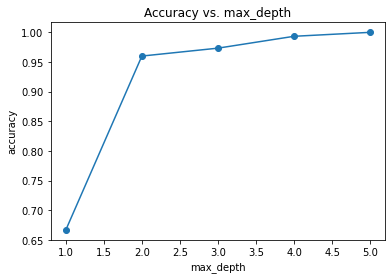

In [20]:
plt.plot(max_depth_range,accuracies, marker='o')
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("Accuracy vs. max_depth")
plt.show()